## Visualization of Simulation Results

### Results for chosen alpha and simulation no. 

In [ ]:
from complex_contagions_package.visualizer import DiffusionPlotter

%matplotlib inline

plotter = DiffusionPlotter(dataset_path="../datasets/orange_gruen_final_ds_connected_watts_strogatz_degree20.nc")
#plotter = DiffusionPlotter(dataset_path="../datasets/orange_gruen_final_ds_random_regular_graph_degree7.nc")
plotter.show_widgets()


Output()

In [2]:
from complex_contagions_package.visualizer import DiffusionPlotter

%matplotlib inline

#plotter = DiffusionPlotter(dataset_path="../datasets/final_ds_connected_watts_strogatz_degree20.nc")
plotter = DiffusionPlotter(dataset_path="../datasets/reversedt0_final_ds_random_regular_graph_degree7.nc")
plotter.show_widgets()

Output()

In [3]:
import xarray as xr

# ds = xr.open_dataset("../datasets/final_ds_connected_watts_strogatz_degree40.nc")
#ds = xr.open_dataset("../datasets/final_ds_random_regular_graph_degree50.nc")
ds = xr.open_dataset("../datasets/reversedt0_final_ds_random_regular_graph_degree7.nc")

ds

<xarray.Dataset> Size: 808MB
Dimensions:       (alpha: 50, simulation: 100, t0: 101, steps: 100)
Coordinates:
  * simulation    (simulation) int64 800B 1 2 3 4 5 6 7 ... 95 96 97 98 99 100
  * t0            (t0) float64 808B 1.0 0.99 0.98 0.97 ... 0.03 0.02 0.01 0.0
  * steps         (steps) int64 800B 1 2 3 4 5 6 7 8 ... 94 95 96 97 98 99 100
  * alpha         (alpha) float64 400B 2.0 4.0 6.0 8.0 ... 94.0 96.0 98.0 100.0
Data variables:
    inflist_asc   (alpha, simulation, t0, steps) float64 404MB ...
    inflist_desc  (alpha, simulation, t0, steps) float64 404MB ...
Attributes:
    n_simulations:   100
    iterations:      100
    network_type:    random_regular_graph
    average_degree:  7

/home/leo1808/MasterThesis/complex_contagions_package/src/complex_contagions_package/visualizer.py:359: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hysteresis_df.groupby(['alpha', 'hysteresis_bin'])


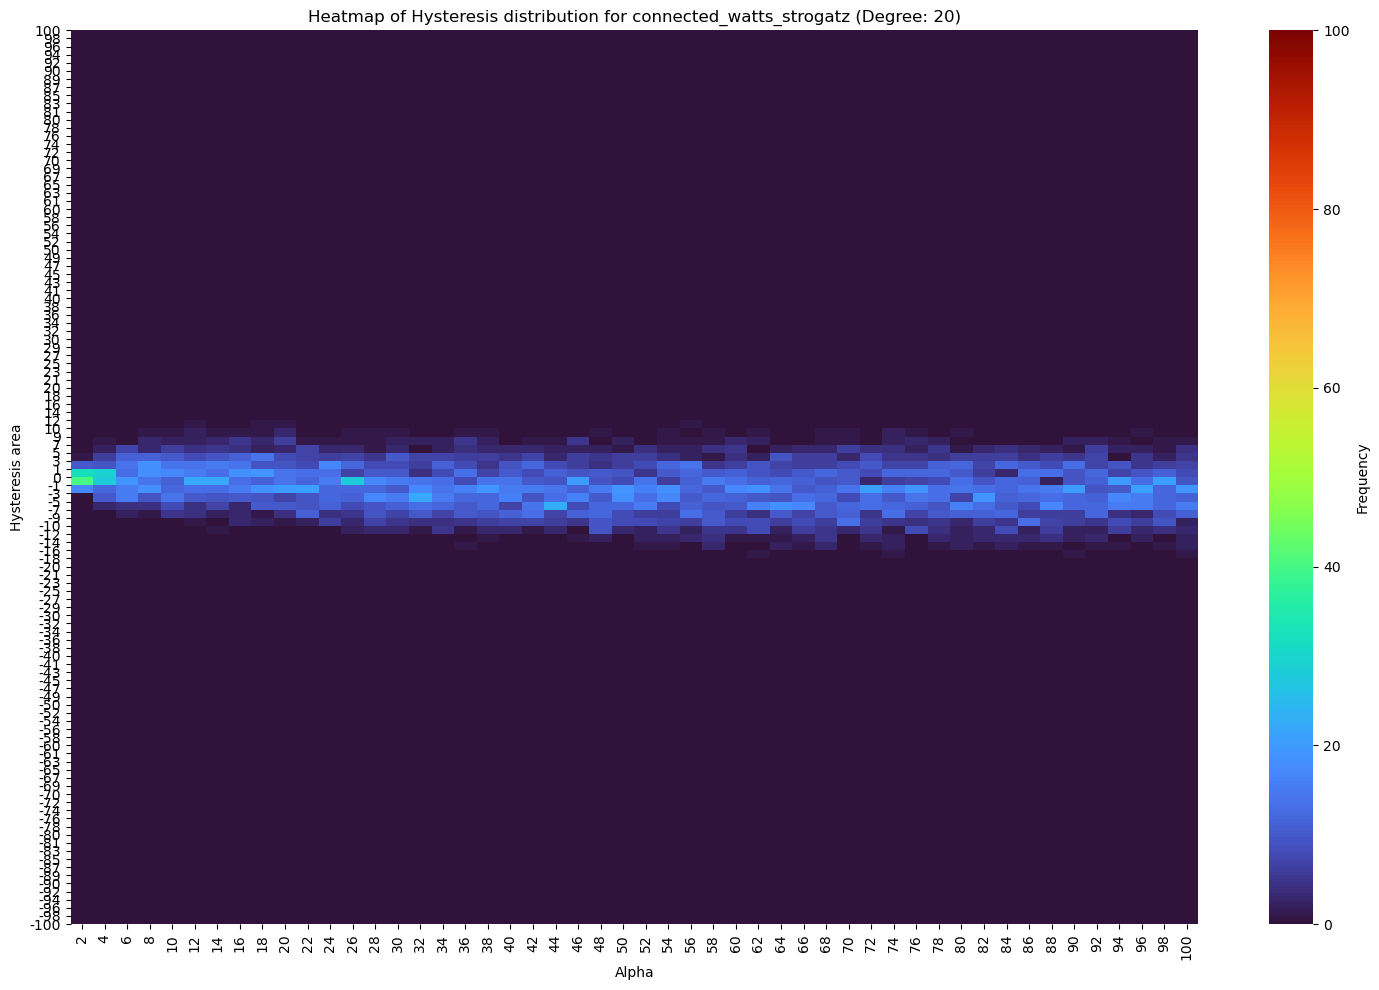

In [2]:
from complex_contagions_package.visualizer import DiffusionPlotter

%matplotlib inline
plotter = DiffusionPlotter(dataset_path="../datasets/orange_gruen_final_ds_connected_watts_strogatz_degree20.nc")
#plotter = DiffusionPlotter(dataset_path="../datasets/orange_gruen_final_ds_random_regular_graph_degree6.nc")
#plotter = DiffusionPlotter(dataset_path="../../trash/v_20012025/datasetsForRec/final_ds_random_regular_graph_degree6.nc")
plotter.hysteresis_heatmap()

In [2]:
from complex_contagions_package.visualizer import heatmap_generator

%matplotlib inline

heatmap_generator(network="random")

/home/leo1808/MasterThesis/complex_contagions_package/src/complex_contagions_package/visualizer.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hysteresis_df.groupby(['alpha', 'hysteresis_bin'])
/home/leo1808/MasterThesis/complex_contagions_package/src/complex_contagions_package/visualizer.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hysteresis_df.groupby(['alpha', 'hysteresis_bin'])
/home/leo1808/MasterThesis/complex_contagions_package/src/complex_contagions_package/visualizer.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pan

In [1]:
from complex_contagions_package.visualizer2 import heatmap_generator

%matplotlib inline

heatmap_generator(network="random")

/home/leo1808/MasterThesis/complex_contagions_package/src/complex_contagions_package/visualizer2.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hysteresis_df.groupby(['recovery_rate', 'hysteresis_bin'])
/home/leo1808/MasterThesis/complex_contagions_package/src/complex_contagions_package/visualizer2.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hysteresis_df.groupby(['recovery_rate', 'hysteresis_bin'])
/home/leo1808/MasterThesis/complex_contagions_package/src/complex_contagions_package/visualizer2.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fu

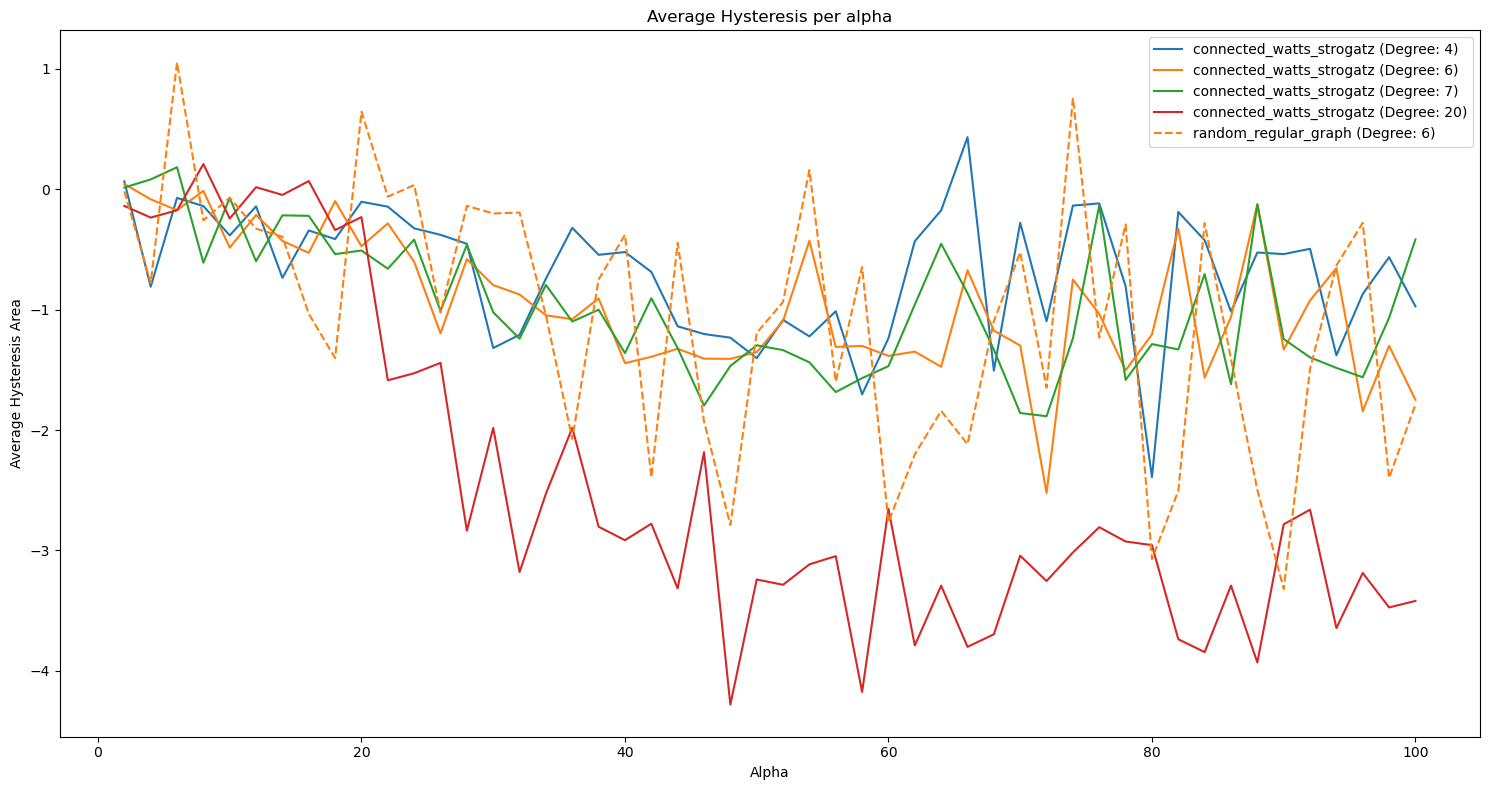

In [1]:
from complex_contagions_package.visualizer import DiffusionPlotter

%matplotlib inline
dataset_paths = [
    "../datasets/orange_gruen_final_ds_connected_watts_strogatz_degree4.nc",
    "../datasets/orange_gruen_final_ds_connected_watts_strogatz_degree6.nc",
    "../datasets/orange_gruen_final_ds_connected_watts_strogatz_degree7.nc",
    "../datasets/orange_gruen_final_ds_connected_watts_strogatz_degree20.nc",

    "../datasets/orange_gruen_final_ds_random_regular_graph_degree6.nc",
]

# Eine Dummy-Instanz erstellen, um die Methode `multiple_instances` zu nutzen
plotter = DiffusionPlotter(dataset_path=dataset_paths[0])
plotter.avg_hysteresis_per_alpha(dataset_paths)

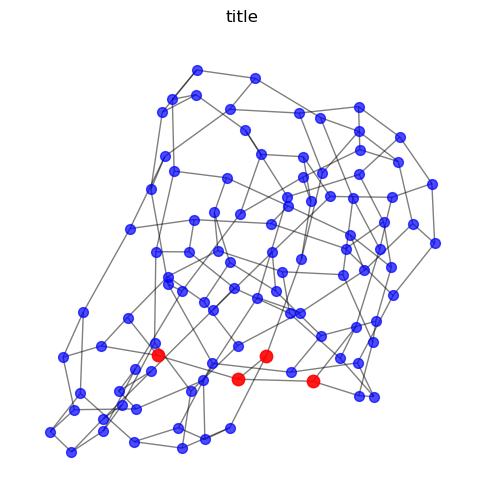

In [3]:
from complex_contagions_package.visualizer import visualize_graph
import networkx as nx

average_degree = 3
t0 = 10
#g_type = nx.connected_watts_strogatz_graph(100, average_degree, 0.5)
g_type = nx.random_regular_graph(average_degree, 100)

visualize_graph(t0, g_type, "title")

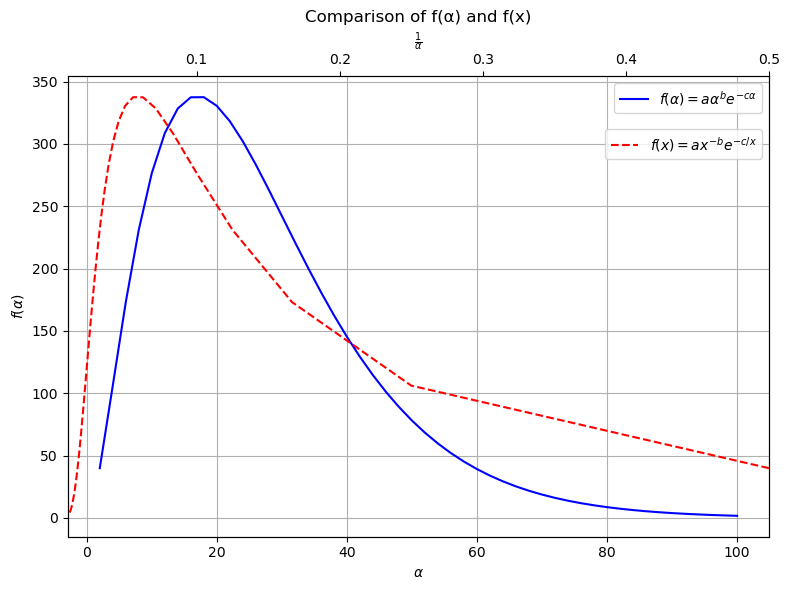

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 15  # Scaling factor
b = 1.7  # Power-law exponent
c = 0.1  # Decay parameter

# Define alpha and x ranges
alpha = np.linspace(2, 100, 50)  # Avoid alpha=0 to prevent singularities

# Compute f(alpha) and f(x)
f_alpha = a * alpha**b * np.exp(-c * alpha)
f_x = (a * (1/alpha)**(-b) * np.exp(-c / (1/alpha)))

# Plot the functions
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot f(alpha)
ax1.plot(alpha, f_alpha, label=r'$f(\alpha) = a \alpha^b e^{-c\alpha}$', color='blue')
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel(r'$f(\alpha)$')
ax1.grid()

# Create secondary x-axis for 1/alpha
ax2 = ax1.twiny()
ax2.set_xlim(1/alpha[-1], 1/alpha[0])  # Adjust x-limits to correspond to 1/alpha
ax2.set_xlabel(r'$\frac{1}{\alpha}$')

# Plot f(x) using ax2 as secondary plot
ax2.plot((1/alpha), f_x, label=r'$f(x) = a x^{-b} e^{-c/x}$', color='red', linestyle='dashed')

# Automatically place the legend within the plot
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9), ncol=1)

plt.title("Comparison of f(α) and f(x)")
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [ ]:
import os
import xarray as xr

data_dir = "../data/"

alpha_files = []
alpha_files = sorted([f for f in os.listdir(data_dir)
                        if "final_simulation_alpha_" in f],
                    key=lambda x: int(x.split("_")[-1].split(".")[0]))


datasets = []

for idx, f in enumerate(alpha_files):
    ds = xr.open_dataset(os.path.join(data_dir, f))
    ds = ds.expand_dims("alpha")
    ds = ds.assign_coords(alpha=(["alpha"], [idx]))
    datasets.append(ds)

final_ds = xr.concat(datasets, dim="alpha")

final_ds.attrs = {
    "n_simulations": 100,
    "iterations": 50,
    "network_type": "random_regular_graph",
    "average_degree": 4
}

merged_filename = os.path.join("../datasets/", f"vart0_final_ds_random_regular_graph_degree4.nc")
final_ds.to_netcdf(merged_filename)

[<xarray.Dataset> Size: 8MB
Dimensions:       (alpha: 1, simulation: 100, t0: 101, steps: 50)
Coordinates:
  * simulation    (simulation) int64 800B 1 2 3 4 5 6 7 ... 95 96 97 98 99 100
  * t0            (t0) float64 808B 0.0 0.01 0.02 0.03 ... 0.97 0.98 0.99 1.0
  * steps         (steps) int64 400B 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * alpha         (alpha) int64 8B 0
Data variables:
    inflist_asc   (alpha, simulation, t0, steps) float64 4MB 48.0 54.0 ... 0.0
    inflist_desc  (alpha, simulation, t0, steps) float64 4MB 49.0 52.0 ... 0.0, <xarray.Dataset> Size: 8MB
Dimensions:       (alpha: 1, simulation: 100, t0: 101, steps: 50)
Coordinates:
  * simulation    (simulation) int64 800B 1 2 3 4 5 6 7 ... 95 96 97 98 99 100
  * t0            (t0) float64 808B 0.0 0.01 0.02 0.03 ... 0.97 0.98 0.99 1.0
  * steps         (steps) int64 400B 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * alpha         (alpha) int64 8B 1
Data variables:
    inflist_asc   (alpha, simulation, t0, step